In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1=pd.read_excel('train.xlsx')

In [3]:
data1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### As there are less missing values dropping them wont affect the data drastically. Hence dropping them.

In [6]:
data1.dropna(inplace=True)

In [7]:
data1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
data1.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### The Date_of_Journey is a object data type. Therefore, converting this datatype into timestamp so as to use this column properly for predictionBecause our model will not understand the string values.
#### dt.day method will extract only day of that date and dt.month method will extract only month of that date

In [9]:
def change_into_datetime(col):
    data1[col]=pd.to_datetime(data1[col])

In [10]:
data1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [12]:
data1.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
data1['Journey_Date']=data1['Date_of_Journey'].dt.day

In [14]:
data1['Journey_Month']=data1['Date_of_Journey'].dt.month

In [15]:
data1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-02-19 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-02-19 05:50:00,2021-02-19 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-02-19 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-02-19 18:05:00,2021-02-19 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-02-19 16:50:00,2021-02-19 21:35:00,4h 45m,1 stop,No info,13302,3,1


#### Since I have converted Date_of_Journey column into integers dropping the column

In [16]:
data1.drop('Date_of_Journey', axis=1, inplace=True)

In [17]:
data1.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-02-19 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-02-19 05:50:00,2021-02-19 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-02-19 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-02-19 18:05:00,2021-02-19 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-02-19 16:50:00,2021-02-19 21:35:00,4h 45m,1 stop,No info,13302,3,1


#### Writing functions for extracting values from Dep_Time and Arrival_Time as well as to drop column!

In [18]:
def extract_hour(df,col):
    df[col+"_Hour"]=df[col].dt.hour

In [19]:
def extract_min(df,col):
    df[col+"_Minute"]=df[col].dt.minute

In [20]:
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [21]:
# Extracting Hours
extract_hour(data1,'Dep_Time')

In [22]:
# Extracting Minutes
extract_min(data1,'Dep_Time')

In [23]:
# Now we can drop Dep_Time as it is of no use
drop_column(data1,'Dep_Time')

In [24]:
data1.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_Time_Hour,Dep_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-02-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-02-19 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-02-19 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [25]:
# Extracting Hours
extract_hour(data1,'Arrival_Time')

In [26]:
# Extracting Minutes
extract_min(data1,'Arrival_Time')

In [27]:
# Now we can drop Arrival_Time as it is of no use
drop_column(data1,'Arrival_Time')

In [28]:
data1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


##### Split Function
'2h 50m'.split(' ')
['2h', '50m']

#### Applying pre-processing on duration column by seperating hours and minutes

In [29]:
duration=list(data1['Duration'])                 #acessing duration and alter list of my duration

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:           #if len is == 2 we skip
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Append 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only minutes, Appending 0 hour
    

In [30]:
data1['Duration'] = duration

In [31]:
data1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


##### Split Function To Access hours and Minutes

'2h 50m'.split(' ')[1][0:-1]

In [32]:
def hour(x):
    return x.split(' ')[0][0:-1]

In [33]:
def min(x):
    return x.split(' ')[1][0:-1]

In [34]:
data1['Duration_Hours']=data1['Duration'].apply(hour)
data1['Duration_Mins']=data1['Duration'].apply(min)

In [35]:
data1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [36]:
data1.drop('Duration',axis=1,inplace=True)

In [37]:
data1.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [38]:
data1.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_Date            int64
Journey_Month           int64
Dep_Time_Hour           int64
Dep_Time_Minute         int64
Arrival_Time_Hour       int64
Arrival_Time_Minute     int64
Duration_Hours         object
Duration_Mins          object
dtype: object

In [39]:
##### changing the format from object to integer
data1['Duration_Hours']=data1['Duration_Hours'].astype(int)
data1['Duration_Mins']= data1['Duration_Mins'].astype(int)

In [40]:
data1.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_Date            int64
Journey_Month           int64
Dep_Time_Hour           int64
Dep_Time_Minute         int64
Arrival_Time_Hour       int64
Arrival_Time_Minute     int64
Duration_Hours          int32
Duration_Mins           int32
dtype: object

In [41]:
data1.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


##### Extracting categorical data and numerical data

In [42]:
cat_col=[col for col in data1.columns if data1[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [43]:
num_col=[col for col in data1.columns if data1[col].dtype!='O']
num_col

['Price',
 'Journey_Date',
 'Journey_Month',
 'Dep_Time_Hour',
 'Dep_Time_Minute',
 'Arrival_Time_Hour',
 'Arrival_Time_Minute',
 'Duration_Hours',
 'Duration_Mins']

### Handling Categorical Data


#### Using 2 main Encoding Techniques to convert Categorical data into Numerical format
    Nominal data --> data are not in any order --> OneHotEncoder is used in this case
    Ordinal data --> data are in order         --> LabelEncoder is used in this case

In [44]:
categorical=data1[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [45]:
categorical['Airline'].value_counts()  # seeing how many unique features available

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#### Airline vs Price Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

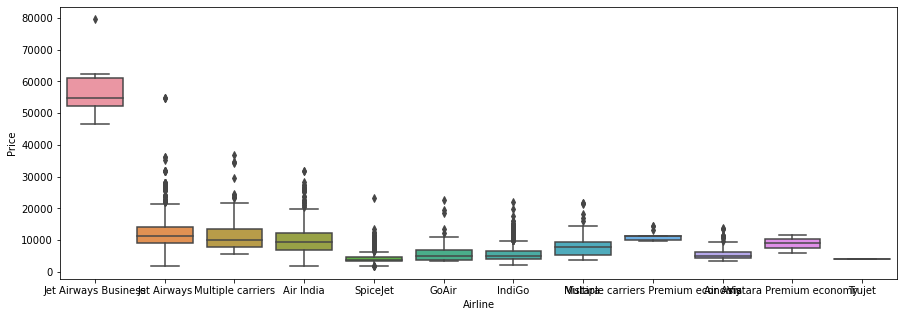

In [46]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data1.sort_values('Price',ascending=False))

##### From graph we can see that Jet Airways Business have the highest Price.

#### Total_Stops vs Price Analysis

<AxesSubplot:xlabel='Price', ylabel='Total_Stops'>

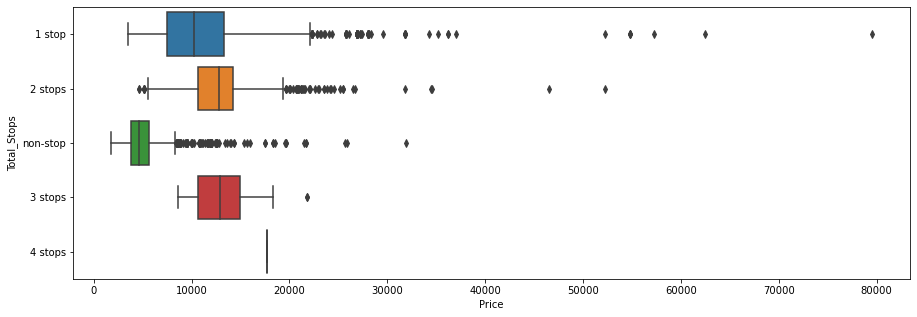

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Stops',x='Price',data=data1.sort_values('Price',ascending=False))

### One Hot Encoding

In [48]:
len(categorical['Airline'].unique())

12

In [49]:
# As Airline is Nominal Categorical data, performing OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


<Figure size 1080x360 with 0 Axes>

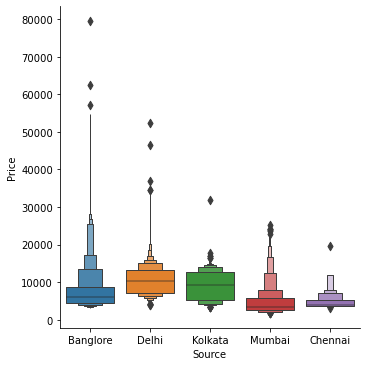

In [50]:
# Source vs Price

plt.figure(figsize=(15,5))
sns.catplot(y='Price',x='Source',data=data1.sort_values('Price',ascending=False),kind='boxen')

In [51]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [52]:
Source=pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


<Figure size 1080x360 with 0 Axes>

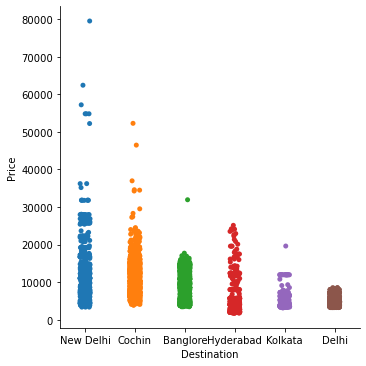

In [53]:
# Destination vs Price

plt.figure(figsize=(15,5))
sns.catplot(y='Price',x='Destination',data=data1.sort_values('Price',ascending=False))

In [54]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [55]:
Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [56]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [57]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [58]:
#splitting Route

categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [59]:
categorical.isnull.sum()

AttributeError: 'function' object has no attribute 'sum'

In [60]:
categorical['Route_1'].fillna('NONE',inplace=True)
categorical['Route_2'].fillna('NONE',inplace=True)
categorical['Route_3'].fillna('NONE',inplace=True)
categorical['Route_4'].fillna('NONE',inplace=True)
categorical['Route_5'].fillna('NONE',inplace=True)

In [61]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NONE,NONE,NONE
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NONE
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NONE
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NONE,NONE
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NONE,NONE


In [62]:
drop_column(categorical,'Route')

In [63]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NONE,NONE,NONE
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NONE
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NONE
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NONE,NONE
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NONE,NONE


### Label Encoding

In [64]:
#extract how many categories in each cat_feature
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



#### As route has alot of categories/features, one hot encoding will not be the best option. Hence appplying Label Encoding

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [66]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [68]:
# Encoding every i ie Route 
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [69]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [74]:
categorical['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [75]:
# Additional_Info contains almost 80% no_info,so we can drop this column
drop_column(categorical,'Additional_Info')

In [76]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [77]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [79]:
# Using custom approach. Using a dictionary. As this is case of Ordinal Categorical type we perform LabelEncoder. Here Values are assigned with corresponding key. 

dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [80]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [81]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [83]:
data1[num_col]

,Price,Journey_Date,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,3,1,11,30,14,10,2,40


In [84]:
# Concatenate dataframe --> categorical + Airline + Source + Destination

data1=pd.concat([categorical,Airline,Source,Destination,data1[num_col]],axis=1) #concatenate in vertical format
data1.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,Journey_Date,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [86]:
drop_column(data1,'Airline')
drop_column(data1,'Source')
drop_column(data1,'Destination')

In [88]:
data1.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_Date,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [89]:
pd.set_option('display.max_columns',35) #display all 35 columns

In [90]:
data1.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_Date,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [91]:
data1.columns

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Price', 'Journey_Date', 'Journey_Month', 'Dep_Time_Hour',
       'Dep_Time_Minute', 'Arrival_Time_Hour', 'Arrival_Time_Minute',
       'Duration_Hours', 'Duration_Mins'],
      dtype='object')

### Outlier Detection

In [97]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

<Figure size 3600x3600 with 0 Axes>

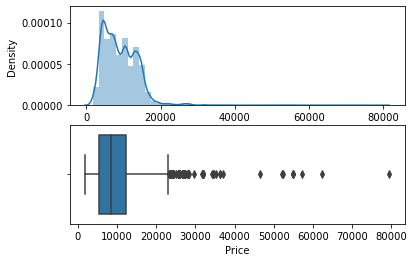

In [101]:
plt.figure(figsize=(50,50))
plot(data1,'Price')

It's positively skewed distribution. In the box plot, whatever data points that is greater than 40000, I'll replace it with the median.

#### dealing with Outliers

In [103]:
data1['Price']=np.where(data1['Price']>=40000,data1['Price'].median(),data1['Price'])

<Figure size 3600x3600 with 0 Axes>

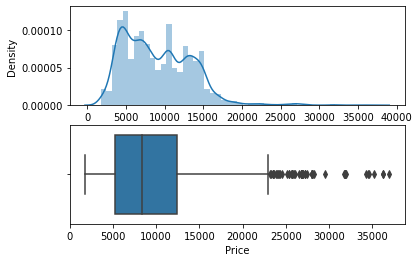

In [104]:
plt.figure(figsize=(50,50))
plot(data1,'Price')

There are not many outliers like before.

### Dependent and Independent Variable

In [105]:
X=data1.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_Date,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [106]:
X.shape

(10682, 34)

In [107]:
Y=data1['Price']
Y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

### Feature Selection

####  Feature Selection using Information Gain

In [108]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif measures how much a given feature can explain the target or any other feature

In [109]:
mutual_info_classif(X,Y)

array([2.13773398e+00, 2.06586802e+00, 2.79789258e+00, 2.27303071e+00,
       1.48936197e+00, 7.43692293e-01, 7.58862898e-01, 1.02844598e-01,
       6.48287095e-01, 9.18665900e-01, 4.98968889e-03, 5.82329326e-01,
       7.43015053e-04, 3.24641004e-01, 9.89305983e-04, 2.23198373e-01,
       0.00000000e+00, 1.67600599e-01, 1.56099623e+00, 8.97639549e-01,
       2.92410490e-01, 1.55788619e+00, 4.05996239e-01, 2.76662129e-01,
       1.75625665e-01, 3.63458452e-01, 1.07049312e+00, 8.73562111e-01,
       1.42250954e+00, 1.21145252e+00, 1.84900070e+00, 1.50415280e+00,
       1.77294217e+00, 1.05998011e+00])

In [121]:
imp=pd.DataFrame(mutual_info_classif(X,Y),index=X.columns)
imp

,0
Total_Stops,2.195923
Route_1,2.012392
Route_2,2.827450
Route_3,2.323667
Route_4,1.445520
Route_5,0.795222
Air India,0.767584
GoAir,0.098375
IndiGo,0.660470
Jet Airways,0.918897


In [122]:
imp.columns = ['Importance']
imp.sort_values(by='Importance',ascending = False)

,Importance
Route_2,2.827450
Route_3,2.323667
Total_Stops,2.195923
Route_1,2.012392
Arrival_Time_Hour,1.849302
Duration_Hours,1.786657
Delhi,1.556184
Cochin,1.518950
Arrival_Time_Minute,1.494166
Route_4,1.445520


So as shown, Trujet and Vistara Premium economy are those columns that are least contributing to the model while Route_2, Route_3, Total_Stops, Route_1,Arrival_Time_Hour and Duration_Hours are the top 5 features contributing to the model. So will drop the once with 0 importance

In [123]:
drop_column(X,'Trujet')
drop_column(X,'Vistara Premium economy')

In [127]:
X.shape

(10682, 32)

#### Split dataset into train & test

In [128]:
from sklearn.model_selection import train_test_split

In [130]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [132]:
from sklearn import metrics
##dump your model using pickle so that we will re-use
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,Y_train)
    print('Training score : {}'.format(model.score(X_train,Y_train)))
    Y_prediction=model.predict(X_test)
    print('Predictions: \n {}'.format(Y_prediction))
    print('\n')
    r2_score=metrics.r2_score(Y_test,Y_prediction)     #checking r-square metrics
    print('R-Square score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(Y_test,Y_prediction))
    print('MSE:',metrics.mean_squared_error(Y_test,Y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,Y_prediction)))
    sns.distplot(Y_test-Y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file=open('E:\Projects\ Flight Price\model.pkl','wb')
        pickle.dump(model,file)

#### Import Random Forest Class

In [133]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9540054763635981
Predictions: 
 [ 2014.85866667  6469.44        7583.66       ... 10890.17666667
  8300.79       11432.16      ]


R-Square score: 0.8028085122352376
MAE: 1151.564487325535
MSE: 4007580.4083727975
RMSE: 2001.8942050899686


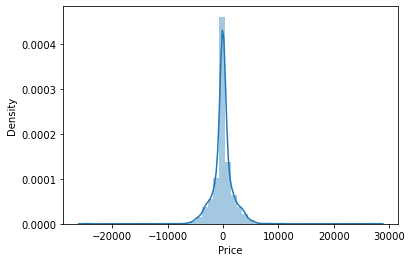

In [134]:
predict(RandomForestRegressor(),1)

#### Algorithms

In [136]:
from sklearn.linear_model import LinearRegression

Training score : 0.6198481500977133
Predictions: 
 [ 3633.47273711  7006.6399625  11899.24550689 ... 11457.60576398
 10043.20440982 10799.25979252]


R-Square score: 0.5990646610897092
MAE: 1978.600488367779
MSE: 8148326.418420159
RMSE: 2854.5273546456265


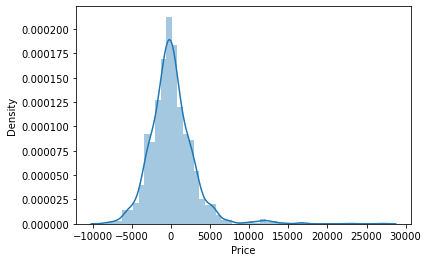

In [137]:
predict(LinearRegression(),0)

In [138]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.9660075277623481
Predictions: 
 [ 2017.  6442.  8405. ... 11701.  8266. 11999.]


R-Square score: 0.724028847547675
MAE: 1296.8135236312587
MSE: 5608642.626416835
RMSE: 2368.257297342676


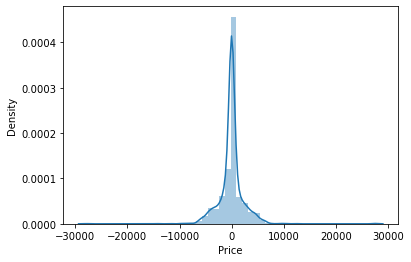

In [139]:
predict(DecisionTreeRegressor(),0)

In [140]:
from sklearn.neighbors import KNeighborsRegressor

Training score : 0.7784622144299326
Predictions: 
 [ 1985.8  6442.   6976.8 ... 11102.4  8255.4 10901.4]


R-Square score: 0.6556418249595142
MAE: 1713.0980814225547
MSE: 6998492.132690688
RMSE: 2645.4663355806833


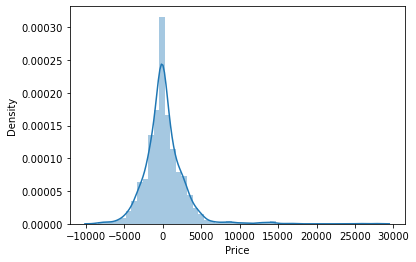

In [141]:
predict(KNeighborsRegressor(),0)

In [142]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9542105371179197
Predictions: 
 [ 2005.664       6460.78        7584.61       ... 10967.96666667
  8225.68       11572.07      ]


R-Square score: 0.803582157271153
MAE: 1148.0121492900719
MSE: 3991857.393530148
RMSE: 1997.9633113573802


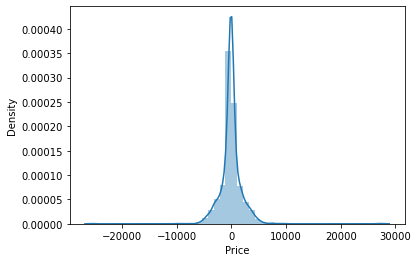

In [143]:
predict(RandomForestRegressor(),0)

### Cross Validation and Hyper Parameter Tuning

#### Hyperparameter Tuning
    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV       --> Slow way to hypertune my model  
    2.Assign hyperparameters in form of dictionary
    3.Fit the model
    4.Check best paramters and best score

In [144]:
from sklearn.model_selection import RandomizedSearchCV

In [145]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [146]:
# Create the random grid

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [147]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

#### Random search of parameters using 3 fold cross validation

In [149]:
reg_rf = RandomForestRegressor()

In [150]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [152]:
rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [153]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 21}

In [154]:
prediction=rf_random.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

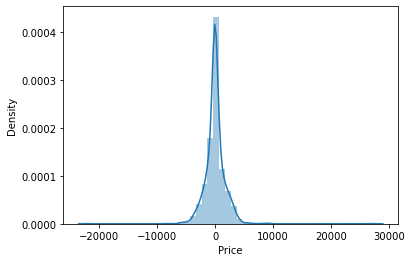

In [155]:
sns.distplot(Y_test-prediction)

In [156]:
metrics.r2_score(Y_test,prediction)

0.8299004409533582

In [157]:
print('MAE',metrics.mean_absolute_error(Y_test,prediction))
print('MSE',metrics.mean_squared_error(Y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

MAE 1103.2638395451766
MSE 3456983.1996063944
RMSE 1859.2964259650462


##### Save the model to reuse it again

In [158]:
import pickle

In [159]:
# open a file, where you want to store the data
file=open('rf_random.pkl','wb')

In [160]:
# dump information to that file
pickle.dump(rf_random,file)

In [161]:
model=open('rf_random.pkl','rb')
forest=pickle.load(model)

In [162]:
y_prediction=forest.predict(X_test)

In [163]:
y_prediction

array([ 2063.93367943,  6467.19234535,  7444.15846576, ...,
       10531.94594963,  8284.79031956, 11362.63414483])

In [165]:
metrics.r2_score(Y_test,y_prediction)

0.8299004409533582